# Group 7 Final Project:  Airline Passenger Satisfaction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering

## Logistic Regression

In [2]:
#Load the dataset
data = pd.read_csv('dataset/test.csv')

#Select the first 1000 rows
data = data.head(1000)

# Convert 'satisfaction' to a binary format
encoder = LabelEncoder()
data['satisfaction'] = encoder.fit_transform(data['satisfaction'])

#Features and target variable
X = data[['Flight Distance']]
y = data['satisfaction']

In [3]:
#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
#Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [5]:
#Predicting results
y_pred = model.predict(X_test)

In [6]:
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.64
Confusion Matrix:
[[90 23]
 [49 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.80      0.71       113
           1       0.62      0.44      0.51        87

    accuracy                           0.64       200
   macro avg       0.64      0.62      0.61       200
weighted avg       0.64      0.64      0.63       200



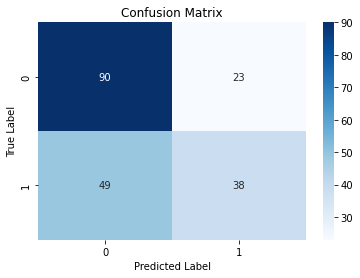

In [7]:
#Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

#Coefficient Plot
if len(X_train.columns) > 1:
    plt.figure()
    coefs = pd.Series(model.coef_[0], index=X_train.columns)
    coefs.plot(kind='bar')
    plt.title('Feature importances')
    plt.show()

## Decision Tree

In [16]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

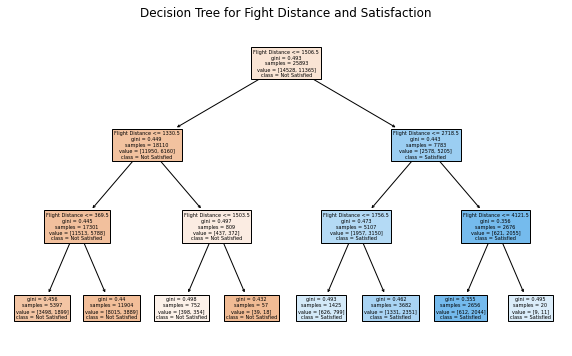

In [17]:
# Convert satisfaction values to binary (positive/negative)
data['satisfaction'] = np.where(data['satisfaction'] == 'satisfied', 1, 0)

# Drop non-numeric columns and unnecessary columns for classification
data = data.drop(columns=['id', 'Gender', 'Customer Type', 'Type of Travel', 'Class'])

# Handle missing values if any
data = data.dropna()

# Define features and target variable
X = data[['Flight Distance']]
y = data['satisfaction']

# Train decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

# Plot decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=['Flight Distance'], class_names=['Not Satisfied', 'Satisfied'])
plt.title('Decision Tree for Fight Distance and Satisfaction')
plt.show()

## Hierarchical Clustering

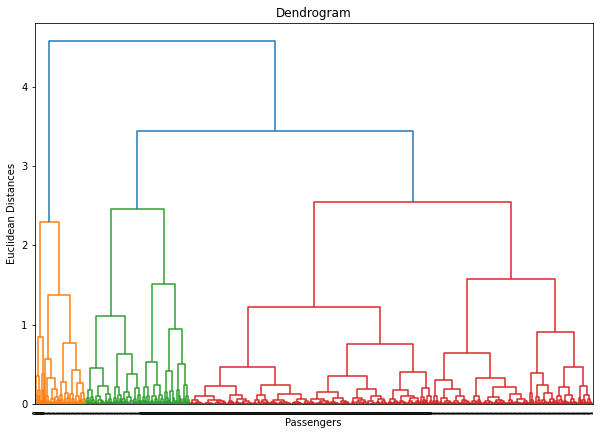

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('dataset/test.csv')


flight_distance = data['Flight Distance'].values
satisfaction = data['satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0}).values


valid_rows = np.logical_and(~np.isnan(flight_distance), flight_distance != 0)
flight_distance = flight_distance[valid_rows]
satisfaction = satisfaction[valid_rows]


sample_size = 1000

random_indices = np.random.choice(len(flight_distance), sample_size, replace=False)
flight_distance_sample = flight_distance[random_indices]
satisfaction_sample = satisfaction[random_indices]


data_for_clustering = np.column_stack((flight_distance_sample, satisfaction_sample))


scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)



Z = shc.linkage(data_for_clustering_scaled, method='complete')

labels = [str(label) for label in satisfaction_sample] 

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(Z, labels=labels) 
plt.xlabel('Passengers')
plt.ylabel('Euclidean Distances')
plt.show()

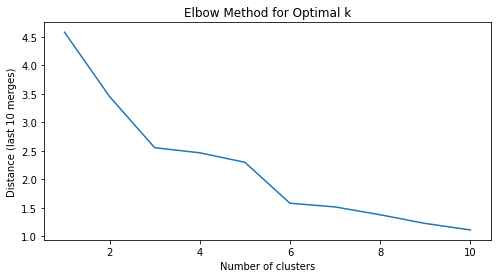

In [19]:
Z = shc.linkage(data_for_clustering_scaled, method='complete')


labels = [str(label) for label in satisfaction_sample] 

last = Z[-10:, 2]  
last_rev = last[::-1]  
idxs = np.arange(1, len(last) + 1)

plt.figure(figsize=(8, 4))
plt.plot(idxs, last_rev)
plt.xlabel('Number of clusters')
plt.ylabel('Distance (last 10 merges)')
plt.title('Elbow Method for Optimal k')
plt.show()

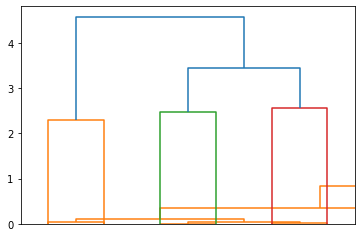

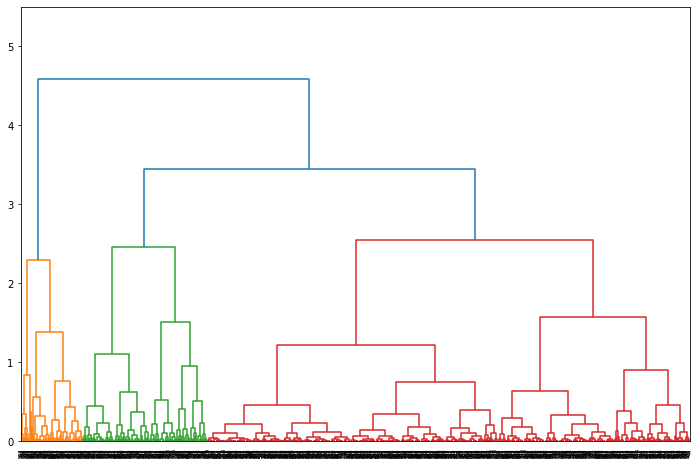

In [20]:
from scipy.cluster.hierarchy import fcluster

cut_off_distance = 2

cluster_labels = fcluster(Z, cut_off_distance, criterion='distance')

# Find cluster labels and number of clusters (same as before)
cluster_labels = fcluster(Z, cut_off_distance, criterion='distance')
num_clusters = len(set(cluster_labels))

# Calculate max_y from the ORIGINAL dendrogram
dendrogram_data = shc.dendrogram(Z)  # Create a temporary dendrogram for calculation
max_y = max(max(coords) for coords in dendrogram_data['icoord'])

# Truncate the dendrogram
dendrogram_truncated = shc.dendrogram(
    Z,
    truncate_mode='lastp',  
    p=num_clusters,
    labels=labels,
    show_leaf_counts=False,
    leaf_rotation=90.,
)


plt.figure(figsize=(12, 8))
dend = shc.dendrogram(Z,labels=None)  # Use the truncated linkage matrix
plt.xlim([0, len(Z) * 10])
plt.ylim([0, 5.5])
plt.show()

In [21]:
# Filter the dataset for relevant columns
data_for_clustering = data[['Flight Distance', 'satisfaction']].copy()

# Convert satisfaction to binary (0/1)
data_for_clustering['satisfaction'] = data_for_clustering['satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0})

# Drop rows with missing values or zero flight distance
data_for_clustering.dropna(inplace=True)
data_for_clustering = data_for_clustering[data_for_clustering['Flight Distance'] != 0]

# Sample your data (optional)
random_indices = np.random.choice(len(data_for_clustering), 1000, replace=False)  # Sample 1000 rows
data_for_clustering_sample = data_for_clustering.iloc[random_indices].copy()


# Standardize the data
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering_sample)

# Perform hierarchical clustering with complete linkage
Z = linkage(data_for_clustering_scaled, method='complete')

# Choose your desired cut-off distance (adjust as needed)
cut_off_distance = 2

# Find cluster labels and number of clusters
cluster_labels = fcluster(Z, cut_off_distance, criterion='distance')
num_clusters = len(set(cluster_labels))

# Create a new DataFrame with the original data and cluster labels
clustered_data_sample = data_for_clustering_sample.copy()
clustered_data_sample['Cluster'] = cluster_labels

# Group by cluster and calculate summary statistics
cluster_summary = clustered_data_sample.groupby('Cluster').agg(
    Flight_Distance_Mean=('Flight Distance', 'mean'),
    Flight_Distance_Median=('Flight Distance', 'median'),
    Satisfaction_Mean=('satisfaction', 'mean'), 
    Cluster_Size=('Cluster', 'size')
).reset_index()

# Display the cluster summary
print("Cluster Summary:")
print(cluster_summary.to_markdown(index=False, numalign='left', stralign='left'))

Cluster Summary:
| Cluster   | Flight_Distance_Mean   | Flight_Distance_Median   | Satisfaction_Mean   | Cluster_Size   |
|:----------|:-----------------------|:-------------------------|:--------------------|:---------------|
| 1         | 2882.06                | 2638                     | 0                   | 47             |
| 2         | 3661.07                | 3717                     | 1                   | 43             |
| 3         | 2514.64                | 2562                     | 1                   | 117            |
| 4         | 732.887                | 615.5                    | 1                   | 282            |
| 5         | 1880.94                | 1874                     | 0                   | 51             |
| 6         | 608.43                 | 549.5                    | 0                   | 460            |


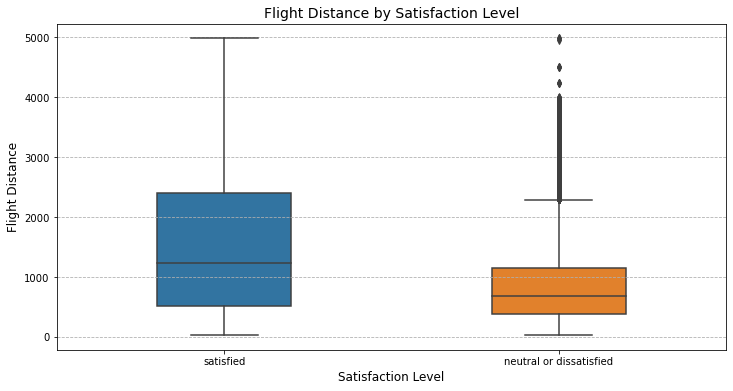

In [22]:
# Figure setup (optional)
plt.figure(figsize=(12, 6))

# Combine into a list for easy iteration
satisfaction_levels = ['satisfied', 'not satisfied']

# Create the boxplot directly using Seaborn with 'satisfaction' as x
sns.boxplot(x='satisfaction', y='Flight Distance', data=data, width=0.4) 

# Plot labels and title
plt.title('Flight Distance by Satisfaction Level', fontsize=14)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Flight Distance', fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--')

plt.show()

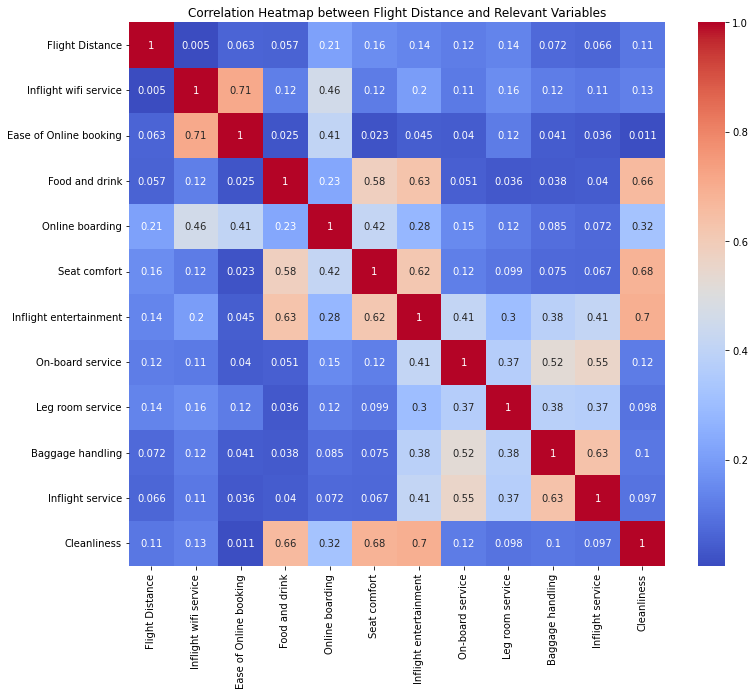

In [23]:
relevant_variables = ['Inflight wifi service', 'Ease of Online booking', 
                      'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                      'On-board service', 'Leg room service', 'Baggage handling', 
                      'Inflight service', 'Cleanliness']


correlation_matrix = data[['Flight Distance'] + relevant_variables].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Flight Distance and Relevant Variables')
plt.show()